In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [7]:
tf.__version__

'2.4.1'

In [2]:
# MNIST 손글씨 인식 데이터 사용
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist 데이터 불러옴
# data shape 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# 신경망에 입력할 형태로 변환
x_train = x_train.reshape(60000, 784) # (60000,28,28) -> (60000, 28*28)
x_test = x_test.reshape(10000, 784) # (10000,28,28) -> (10000, 28*28)

# RGB Max값인 255로 나누어져 모든 값을 [0,1] 사이 값으로 Scaling
x_train = x_train.astype(np.float32)/255.0 
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10) # train set label 값 10개(0,1,2 ... 9)로 카테고리화
y_test = tf.keras.utils.to_categorical(y_test, 10) # test set label 값 10개(0,1,2 ... 9)로 카테고리화

In [9]:
# 신경망 구조 설정
n_input = 784 # input units : 28*28
n_hidden1 = 1024 # hidden layer 1 units 개수 설정
n_hidden2 = 512  # hidden layer 2 units 개수 설정
n_hidden3 = 512  # hidden layer 3 units 개수 설정
n_hidden4 = 512  # hidden layer 4 units 개수 설정
n_output = 10 # output units : 0~9 까지 10개 카테고리 중 하나

In [10]:
# 손실함수 성능 비교 1 - 평균 제곱 오차

# 신경망 모델 객체 생성
dmlp_mse = Sequential() 
# hidden layer 1 unit, 활성화 함수 = 'tanh', input shape= 784(28*28) 설정
dmlp_mse.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
# hidden layer 2 unit, 활성화 함수 = 'tanh'
dmlp_mse.add(Dense(units=n_hidden2, activation='tanh')) 
# hidden layer 3 unit, 활성화 함수 = 'tanh'
dmlp_mse.add(Dense(units=n_hidden3, activation='tanh')) 
# hidden layer 4 unit, 활성화 함수 = 'tanh'
dmlp_mse.add(Dense(units=n_hidden4, activation='tanh'))
# output layer unit = 10(0~9 카테고리), 활성화 함수 = 'softmax' (0~9 카테고리 중 어느 카테고리에 속하는지에 대한 확률값 출력)
dmlp_mse.add(Dense(units=n_output, activation='softmax'))
# 하이퍼 파라미터 설정
# 손실함수 : MSE(평균 제곱 오차), Adam 옵티마이저, learning_rate = 0.0001, 평가 기준 : 정확도
dmlp_mse.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# model 학습
hist_mse = dmlp_mse.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test,y_test),
                        verbose=2)
# verbose option : epoch 진행 과정 출력 옵션
# 0 = silent / 1 = progress bar /2 = one line per epoch

Epoch 1/30
469/469 - 18s - loss: 0.0165 - accuracy: 0.8924 - val_loss: 0.0107 - val_accuracy: 0.9307
Epoch 2/30
469/469 - 17s - loss: 0.0098 - accuracy: 0.9363 - val_loss: 0.0083 - val_accuracy: 0.9457
Epoch 3/30
469/469 - 17s - loss: 0.0076 - accuracy: 0.9514 - val_loss: 0.0071 - val_accuracy: 0.9543
Epoch 4/30
469/469 - 17s - loss: 0.0061 - accuracy: 0.9608 - val_loss: 0.0063 - val_accuracy: 0.9595
Epoch 5/30
469/469 - 17s - loss: 0.0051 - accuracy: 0.9678 - val_loss: 0.0053 - val_accuracy: 0.9655
Epoch 6/30
469/469 - 17s - loss: 0.0043 - accuracy: 0.9736 - val_loss: 0.0050 - val_accuracy: 0.9682
Epoch 7/30
469/469 - 17s - loss: 0.0037 - accuracy: 0.9773 - val_loss: 0.0045 - val_accuracy: 0.9701
Epoch 8/30
469/469 - 17s - loss: 0.0032 - accuracy: 0.9803 - val_loss: 0.0042 - val_accuracy: 0.9720
Epoch 9/30
469/469 - 17s - loss: 0.0028 - accuracy: 0.9831 - val_loss: 0.0038 - val_accuracy: 0.9748
Epoch 10/30
469/469 - 17s - loss: 0.0025 - accuracy: 0.9854 - val_loss: 0.0039 - val_accura

In [11]:
# 손실함수 성능 비교 2 - 교차 엔트로피

# 신경망 모델 객체 생성
dmlp_ce = Sequential() 
# hidden layer 1 unit, 활성화 함수 = 'tanh', input shape= 784(28*28) 설정
dmlp_ce.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
# hidden layer 2 unit, 활성화 함수 = 'tanh'
dmlp_ce.add(Dense(units=n_hidden2, activation='tanh')) 
# hidden layer 3 unit, 활성화 함수 = 'tanh'
dmlp_ce.add(Dense(units=n_hidden3, activation='tanh')) 
# hidden layer 4 unit, 활성화 함수 = 'tanh'
dmlp_ce.add(Dense(units=n_hidden4, activation='tanh'))
# output layer unit = 10(0~9 카테고리), 활성화 함수 = 'softmax' (0~9 카테고리 중 어느 카테고리에 속하는지에 대한 확률값 출력)
dmlp_ce.add(Dense(units=n_output, activation='softmax'))
# 하이퍼 파라미터 설정
# 손실함수 : CE(Cross Entropy), Adam 옵티마이저, learning_rate = 0.0001, 평가 기준 : 정확도
dmlp_ce.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# model 학습
hist_ce = dmlp_ce.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test,y_test),
                        verbose=2)
# verbose option : epoch 진행 과정 출력 옵션
# 0 = silent / 1 = progress bar /2 = one line per epoch

Epoch 1/30
469/469 - 18s - loss: 0.3692 - accuracy: 0.8944 - val_loss: 0.2312 - val_accuracy: 0.9316
Epoch 2/30
469/469 - 17s - loss: 0.2034 - accuracy: 0.9401 - val_loss: 0.1644 - val_accuracy: 0.9515
Epoch 3/30
469/469 - 17s - loss: 0.1444 - accuracy: 0.9568 - val_loss: 0.1283 - val_accuracy: 0.9620
Epoch 4/30
469/469 - 17s - loss: 0.1124 - accuracy: 0.9663 - val_loss: 0.1168 - val_accuracy: 0.9643
Epoch 5/30
469/469 - 17s - loss: 0.0905 - accuracy: 0.9732 - val_loss: 0.0922 - val_accuracy: 0.9708
Epoch 6/30
469/469 - 17s - loss: 0.0737 - accuracy: 0.9778 - val_loss: 0.0876 - val_accuracy: 0.9721
Epoch 7/30
469/469 - 17s - loss: 0.0597 - accuracy: 0.9820 - val_loss: 0.0839 - val_accuracy: 0.9739
Epoch 8/30
469/469 - 17s - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0765 - val_accuracy: 0.9755
Epoch 9/30
469/469 - 17s - loss: 0.0418 - accuracy: 0.9873 - val_loss: 0.0736 - val_accuracy: 0.9761
Epoch 10/30
469/469 - 17s - loss: 0.0348 - accuracy: 0.9898 - val_loss: 0.0667 - val_accura

In [12]:
# 두 모델 정확도 비교
res_mse = dmlp_mse.evaluate(x_test, y_test, verbose=0)
print("평균 제곱 오차 정확도 : ", res_mse[1]*100)
res_ce = dmlp_ce.evaluate(x_test, y_test, verbose=0)
print("교차 엔트로피 정확도 : ", res_ce[1]*100)

평균 제곱 오차 정확도 :  98.19999933242798
교차 엔트로피 정확도 :  98.07000160217285


In [14]:
print(res_mse)
print(res_ce)

[0.0028462205082178116, 0.9819999933242798]
[0.08030375093221664, 0.9807000160217285]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

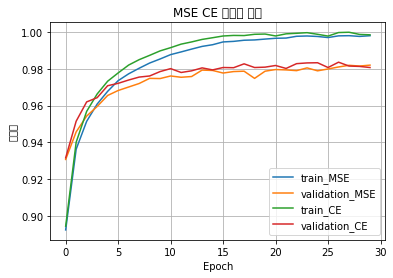

In [15]:
# 그래프를 통한 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy']) # 평균제곱오차 train set에 대한 정확도
plt.plot(hist_mse.history['val_accuracy']) # 평균제곱오차 validation set에 대한 정확도
plt.plot(hist_ce.history['accuracy']) # 교차엔트로피 train set에 대한 정확도
plt.plot(hist_ce.history['val_accuracy']) # 교차엔트로피 validation set에 대한 정확도
plt.title("MSE CE Accuracy Comparison") # 그래프 제목
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_MSE','validation_MSE','train_CE','validation_CE'], loc='best') # legend 위치 : 잘 어울리도록 배치
plt.grid() # 가로 세로 점선 옵션
plt.show()